# Titanic-raportti

- Harjoituksen tavoitteena on opetella datasetin visualisointia Pythonin Numpy, Pandas, Matplotlib ja Seaborn kirjastoilla.
- Tarkastelemme Titanic-tietokantaa erityisesti lähtökaupungeittain etsiäksemme eroavaisuuksia, yhteneväisyyksiä sekä yllättäviä muuttujia.

## Datasetin luominen

In [40]:
#ladataan tarvittavat kirjastot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#valitaan seaborn-tyyli
sns.set(style='darkgrid')
#poistetaan häiritsevät varoitustekstit
import warnings;
warnings.filterwarnings('ignore')


In [38]:
#ladataan Titanic-datasetti ja tulostetaan muutama alkurivi
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [55]:
#tutkitaan datasetin sisältöä tarkemmin
df.info()
#huomataan, että ikä- ja deck-kategorioissa paljon puuttuvaa tietoa

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


## Kuvaajat ja datan analysointi

<Axes: title={'center': 'Queenstown'}, xlabel='class', ylabel='count'>

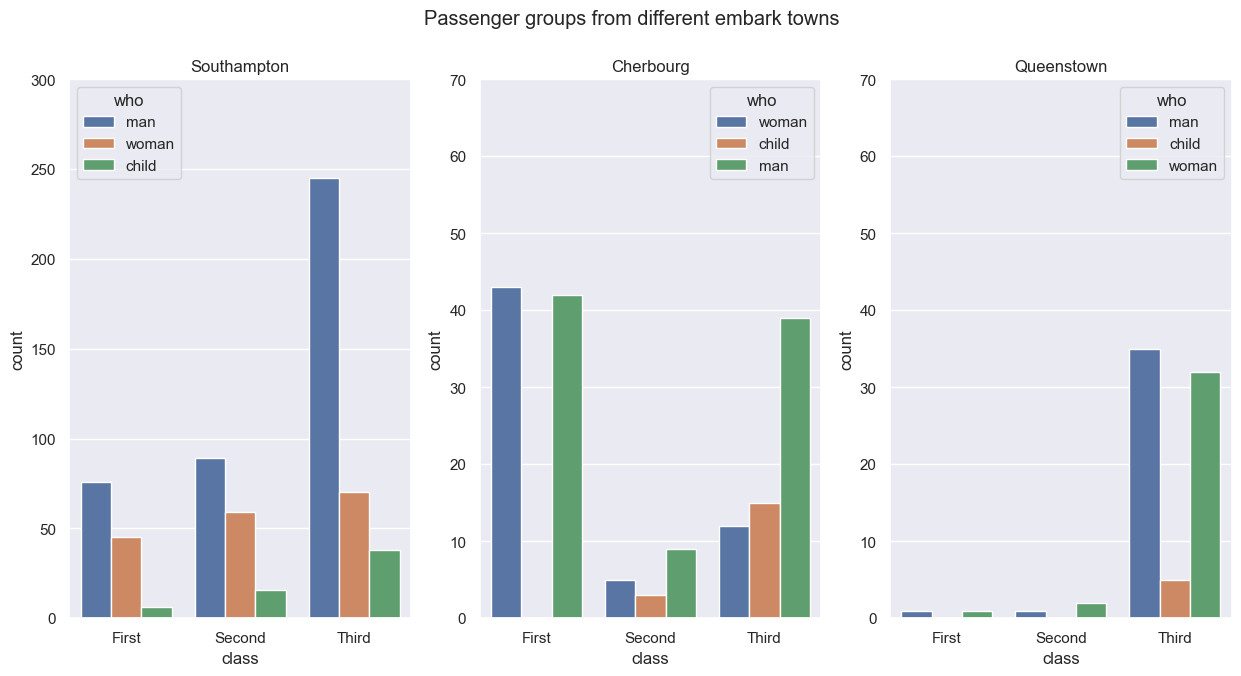

In [ ]:

#lähdetään tarkastelemaan matkustajia lähtökaupungin mukaan
figure, axes = plt.subplots(1, 3, figsize=(15,7), sharey=False)
figure.suptitle('Passenger groups from different embark towns')

axes[0].set_title('Southampton')
axes[0].set_ylim(0,300)
axes[1].set_title('Cherbourg')
axes[1].set_ylim(0,70)
axes[2].set_title('Queenstown')
axes[2].set_ylim(0,70)

sns.countplot(ax=axes[0], data=df[df['embark_town']=='Southampton'], x='class', hue='who')
sns.countplot(ax=axes[1], data=df[df['embark_town']=='Cherbourg'], x='class', hue='who')
sns.countplot(ax=axes[2], data=df[df['embark_town'] == 'Queenstown'], x='class', hue='who')

#huomataan, että määrällisesti eniten lähtijoitä oli Southamptonista, suhteellisesti eniten kolmannen luokan matkustajia Queenstownista


<Axes: title={'center': 'Queenstown'}, xlabel='age', ylabel='Count'>

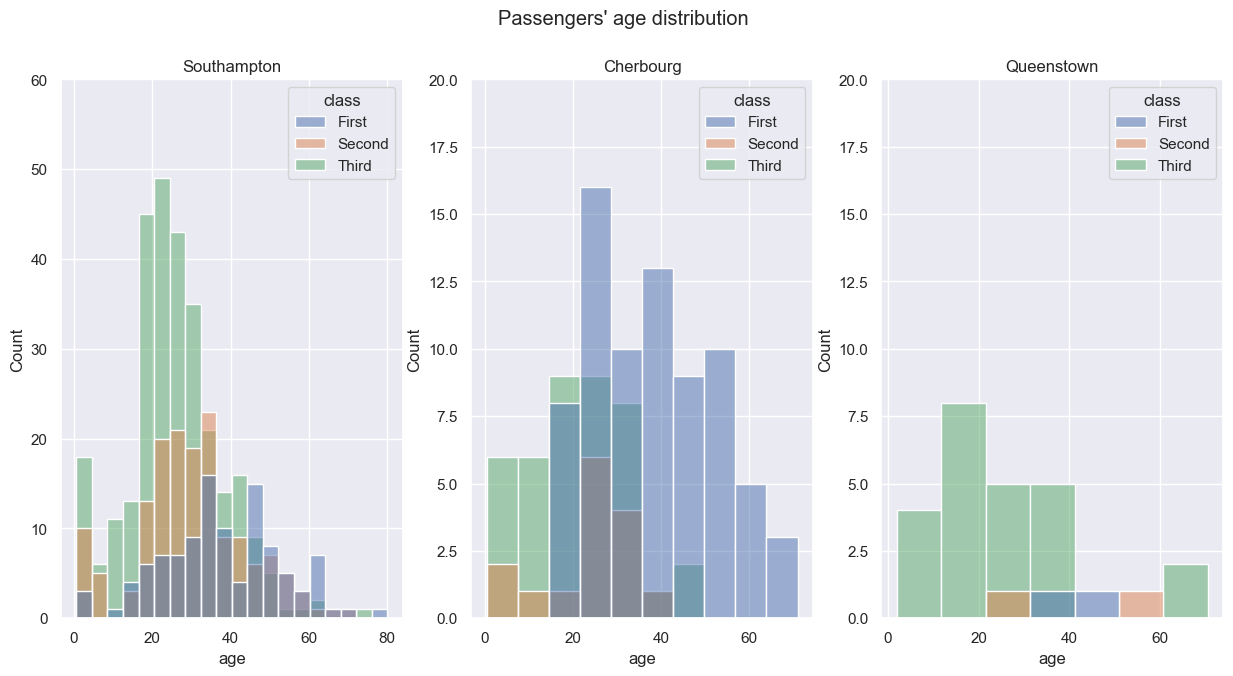

In [58]:
#tarkastellaan matkustajien ikä- ja luokkajakaumaa lähtökaupungeittain
#alussa huomattu ikädatan puuttuminen tulee ottaa huomioon dataa tulkittaessa tai vaihtoehtoisesti korjata datasta tarkempaa analyysiä varten

figure, axes = plt.subplots(1, 3, figsize=(15,7), sharey=False)
figure.suptitle("Passengers' age distribution")

axes[0].set_title('Southampton')
axes[0].set_ylim(0,60)
axes[1].set_title('Cherbourg')
axes[1].set_ylim(0,20)
axes[2].set_title('Queenstown')
axes[2].set_ylim(0,20)

sns.histplot(ax=axes[0], data=df[df['embark_town']=='Southampton'], x='age', hue='class')
sns.histplot(ax=axes[1], data=df[df['embark_town']=='Cherbourg'], x='age', hue='class')
sns.histplot(ax=axes[2], data=df[df['embark_town'] == 'Queenstown'], x='age', hue='class')

#ikäjakaumat ovat kohtalaisen tasaisia kaikista lähtökaupungeista
#kolmannen luokan matkustajat ovat keskimäärin nuorempaa ikäluokkaa kuin ensimmäisen luokan matkustajat 
#vanhimmat matkustajat lähtivät Southamptonista
#20-30-vuotiaiden kolmannen luokan matkustajien määrä korostuu Southamptonin matkustajissa
#Cherbourgista lähti taas enemmän ensimmäisen luokan matkustajia suhteessa muihin matkustajaluokkiin
#Queenstownin matkustajissa selkeästi enemmän kolmannen luokan matkustajia muihin matkustajaluokkiin nähden


<Axes: title={'center': 'Queenstown'}, xlabel='age', ylabel='fare'>

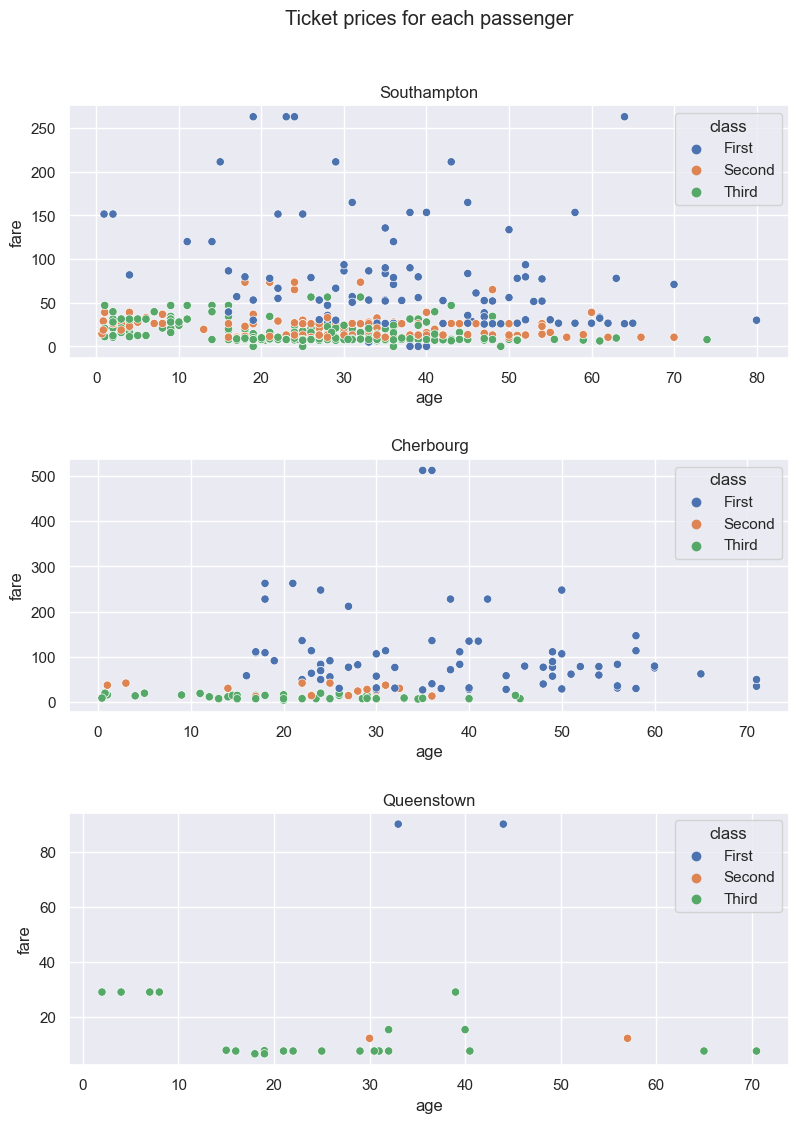

In [ ]:
#tarkastellaan matkustajien lippuhintoja ikä- ja matkustajaluokittain

figure, axes = plt.subplots(3, 1, figsize=(9,12), sharex=False)
figure.suptitle('Ticket prices for each passenger')
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

axes[0].set_title('Southampton')
axes[1].set_title('Cherbourg')
axes[2].set_title('Queenstown')


sns.scatterplot(ax=axes[0], data=df[df['embark_town']=='Southampton'], x='age', y='fare', hue='class')
sns.scatterplot(ax=axes[1], data=df[df['embark_town']=='Cherbourg'], x='age', y='fare', hue='class')
sns.scatterplot(ax=axes[2], data=df[df['embark_town'] == 'Queenstown'], x='age', y='fare', hue='class')

#huomataan, että erityisesti ensimmäisen luokan matkustajien lippuhinnoissa on todella suurta hajontaa
#Cherbourgista lähteneet kaksi ensimmäisen luokan matkustajaa maksoivat lipuistaan eniten, yli 500 dollaria
#muihin lippukategorioihin verrattuna on selvää, että ensimmäisen luokan lippujen hinnoittelussa on jotain poikkeuksellista


<Axes: title={'center': 'Queenstown'}, xlabel='survived', ylabel='count'>

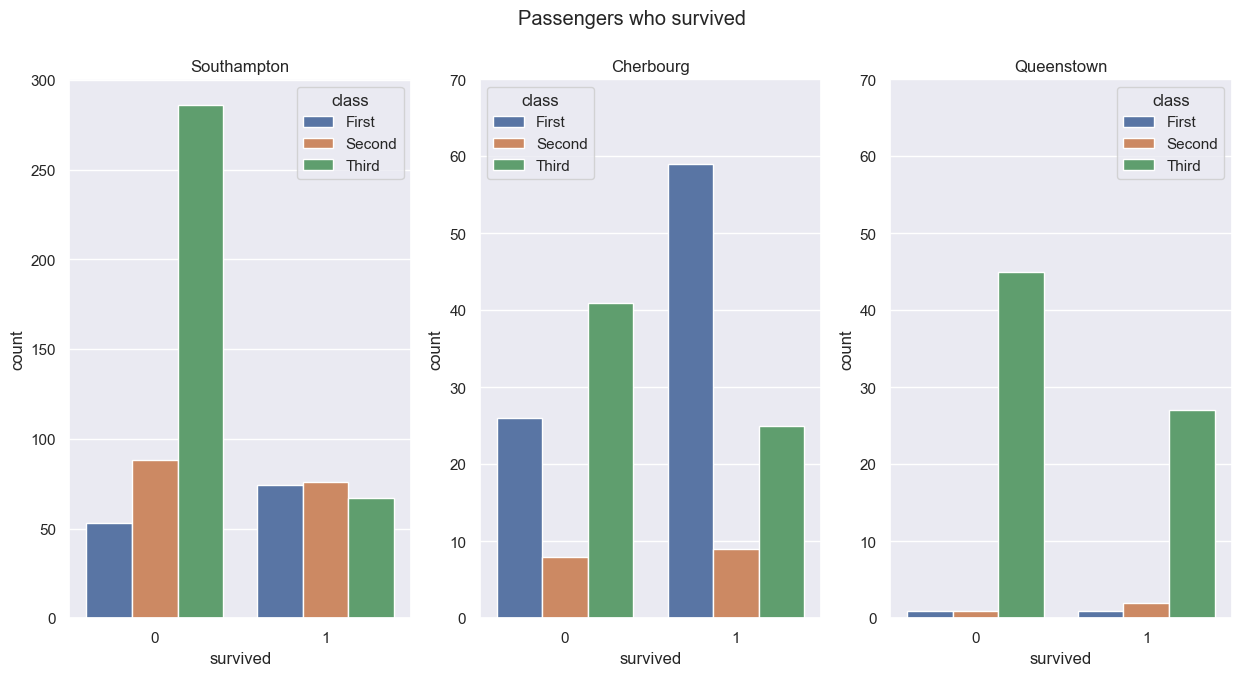

In [62]:
#tarkastellaan selviytyneiden määrää matkustajaluokittain ja lähtökaupungeittain

figure, axes = plt.subplots(1, 3, figsize=(15,7), sharex=True)
figure.suptitle('Passengers who survived')

axes[0].set_title('Southampton')
#axes[0].set_ylim(0,300)
axes[1].set_title('Cherbourg')
axes[1].set_ylim(0,70)
axes[2].set_title('Queenstown')
axes[2].set_ylim(0,70)

sns.countplot(ax=axes[0], data=df[df['embark_town'] == 'Southampton'], x='survived', hue='class')
sns.countplot(ax=axes[1], data=df[df['embark_town'] == 'Cherbourg'], x='survived', hue='class')
sns.countplot(ax=axes[2], data=df[df['embark_town'] == 'Queenstown'], x='survived', hue='class')

#huomataan, että määrällisesti eniten menehtyneissä oli Southamptonista lähteneitä kolmannen luokan matkustajia

<function matplotlib.pyplot.show(close=None, block=None)>

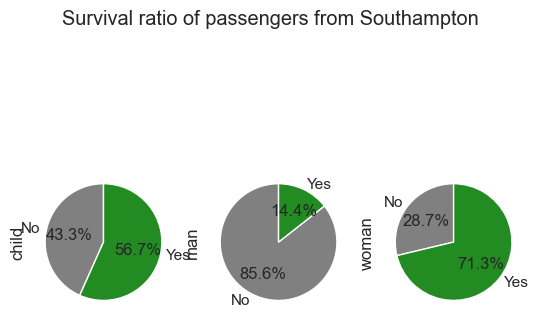

In [35]:
#tarkastellaan selviytyneiden ja menehtyneiden jakaumaa siten, että otetaan huomioon, onko henkilö lapsi, mies vai nainen

df_south = df[df['embark_town']=='Southampton']

df_south = pd.crosstab(df_south['survived'],df_south['who'])
df_south.plot.pie(subplots=True, autopct='%1.1f%%', legend=None, labels=['No', 'Yes'], startangle=90, title='Survival ratio of passengers from Southampton', colors=['grey', 'forestgreen'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

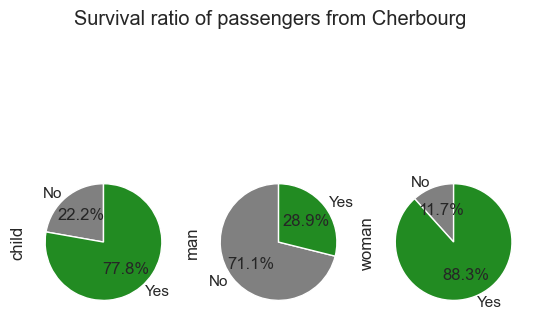

In [37]:
df_cherbourg = df[df['embark_town']=='Cherbourg']

df_cherbourg = pd.crosstab(df_cherbourg['survived'],df_cherbourg['who'])
df_cherbourg.plot.pie(subplots=True, autopct='%1.1f%%', legend=None, labels=['No', 'Yes'], startangle=90, title='Survival ratio of passengers from Cherbourg', colors=['grey', 'forestgreen'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

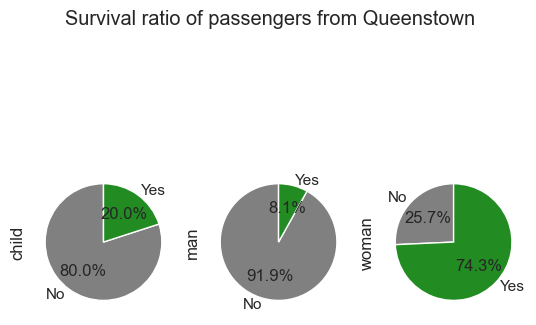

In [ ]:
df_queenstown = df[df['embark_town'] == 'Queenstown']

df_queenstown = pd.crosstab(df_queenstown['survived'],df_queenstown['who'])
df_queenstown.plot.pie(subplots=True, autopct='%1.1f%%', legend=None, labels=['No', 'Yes'], startangle=90, title='Survival ratio of passengers from Queenstown', colors=['grey', 'forestgreen'])
plt.show

#huomataan, että naisilla oli selkeästi suurempi suhteellinen todennäköisyys selviytyä
#myös lapsilla oli paremmat selviytymismahdollisuudet kuin miehillä
#kuitenkin Queenstownista lähteneiden lasten selvitymismahdollisuudet olivat selkeästi heikommat kuin muiden lähtökaupunkien lapsilla, miksi?
#vertailevien piiraskuvaajien muokkaamisessa oli haasteita, kuinka muokata tekstien sijaintia?

## Loppupäätelmät
Jo alussa huomattiin, että datasetin ikä-kategoriassa oli paljon puuttuvia arvoja. Tässä harjoituksessa puuttuvia arvoja ei korjattu, mikä heikentää analyysin tarkkuutta. Kaupungeittain vertailtuna isoin eroavaisuus löytyi selviytyneissä. Queenstownista lähteneillä lapsilla oli selkeästi huonommat selviytymismahdollisuudet verrattuna muihin lapsiin. Myös Southamptonista lähteneet kolmannen matkustajaluokan miehet muodostivat isoimman joukon menehtyneistä. Matkustajien lippuhintoja tarkastellessa huomattiin todella laajaa vaihtelua ensimmäisen luokan matkustajien lippuhinnoissa. Lähtökaupunki ei selitä lippujen vaihtelua, joten lisää tietoa tarvitaan, jotta voidaan ymmärtää arvojen laajaa skaalaa kategoriassa.